In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv


# GEREKLİ KÜTÜPHANELERİN İMPORT EDİLMESİ

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv") #VERİNİN DATAFRAME İÇİN KAYDEDİLMESİ

In [12]:
df.info() #İŞLEM YAPILACAK VERİ HAKKINDA BİLGİ TOPLANMASI

<class 'pandas.core.frame.DataFrame'>
Index: 6679660 entries, 2024-09-13 04:00:00 to 2012-01-01 05:01:00
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Open    float64
 1   High    float64
 2   Low     float64
 3   Close   float64
 4   Volume  float64
dtypes: float64(5)
memory usage: 305.8+ MB


In [5]:
df.columns #VERİ SÜTÜNLARI HAKKINDA BİLGİ 

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [16]:
df.head(4) #VERİNİN İLK 4 SATIRI

,Timestamp,Open,High,Low,Close,Volume
0,2024-09-13 04:00:00,57854.0,57864.0,57835.0,57835.0,1.353466
1,2024-09-13 03:59:00,57854.0,57854.0,57854.0,57854.0,0.252322
2,2024-09-13 03:58:00,57875.0,57875.0,57842.0,57842.0,1.271825
3,2024-09-13 03:57:00,57875.0,57877.0,57875.0,57877.0,0.288940


In [18]:
df.size #VERİ BOYUTU HAKKINDA BİLGİ

40077960

In [19]:
df.describe() #VERİNİN TANIMLANMASI

,Open,High,Low,Close,Volume
count,6.679660e+06,6.679660e+06,6.679660e+06,6.679660e+06,6.679660e+06
mean,1.399612e+04,1.400225e+04,1.398979e+04,1.399614e+04,5.496624e+00
std,1.877651e+04,1.878398e+04,1.876891e+04,1.877660e+04,2.303143e+01
min,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,4.086600e+02,4.088400e+02,4.084300e+02,4.086300e+02,1.814624e-02
50%,6.111195e+03,6.114915e+03,6.106920e+03,6.111005e+03,5.000000e-01
75%,2.237700e+04,2.238100e+04,2.237225e+04,2.237700e+04,3.206110e+00
max,7.379300e+04,7.379400e+04,7.373900e+04,7.379400e+04,5.853852e+03


# MATPLOTLİB VE SEABORN KÜTÜPHANELERİ İLE KEŞİFSEL VERİ ANALİZİ

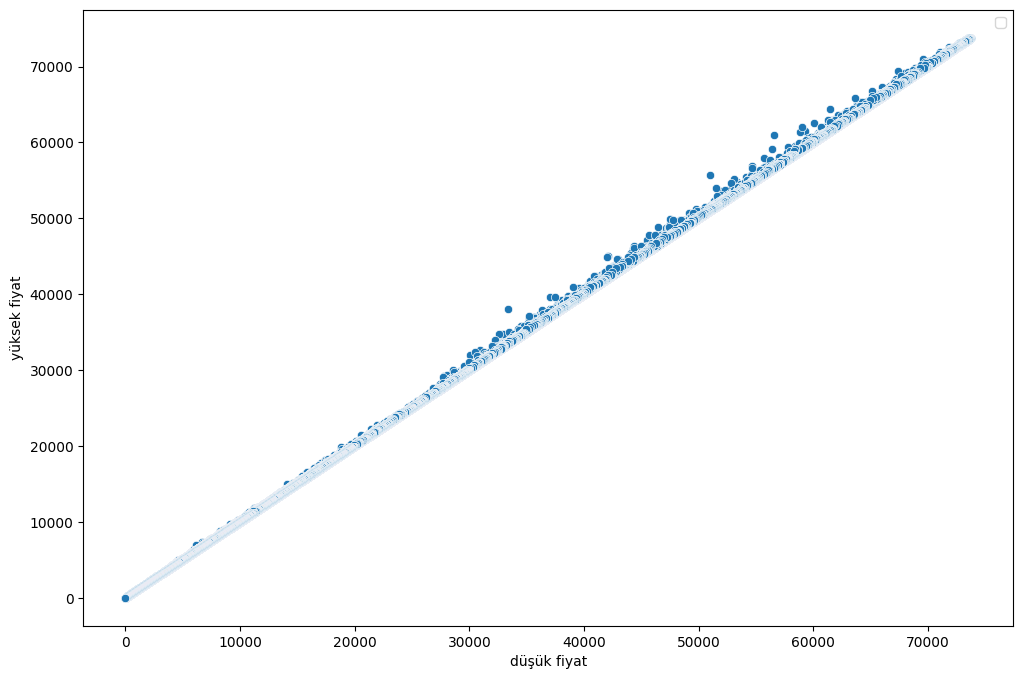

In [5]:
plt.figure(figsize=(12,8)) #Grafik Boyutu
sns.scatterplot(x='Low', y='High', data=df) #Karşılaştırılacak olan verilerin tanımlanması
plt.xlabel("düşük fiyat")
plt.ylabel("yüksek fiyat")
plt.legend()
plt.show()

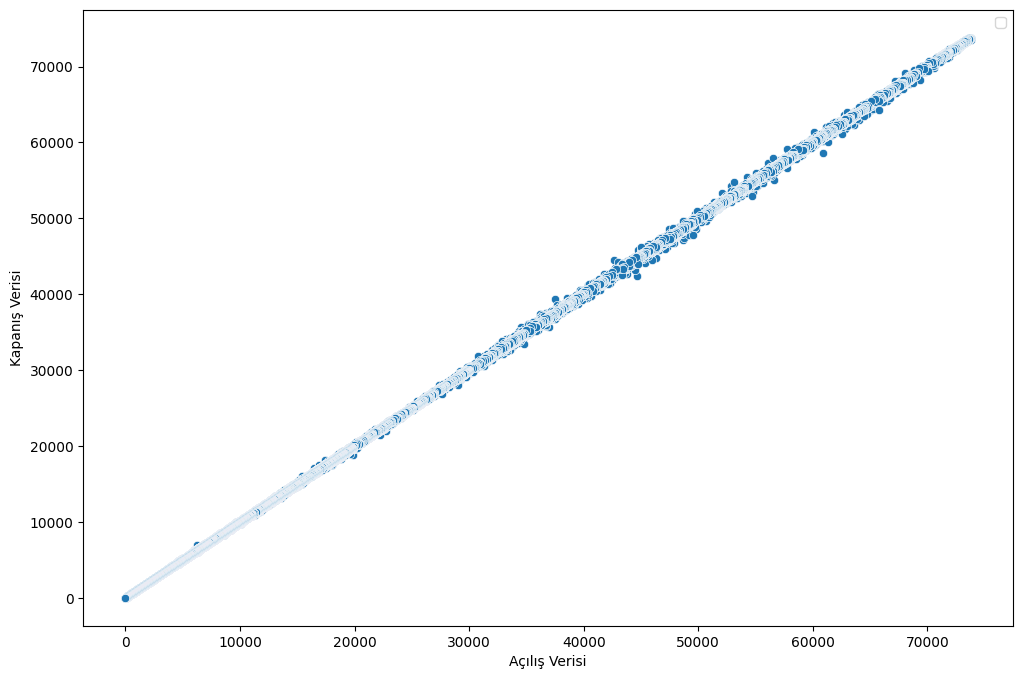

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Open', y='Close', data=df)
plt.xlabel("Açılış Verisi")
plt.ylabel("Kapanış Verisi")
plt.legend()
plt.show()

<Axes: >

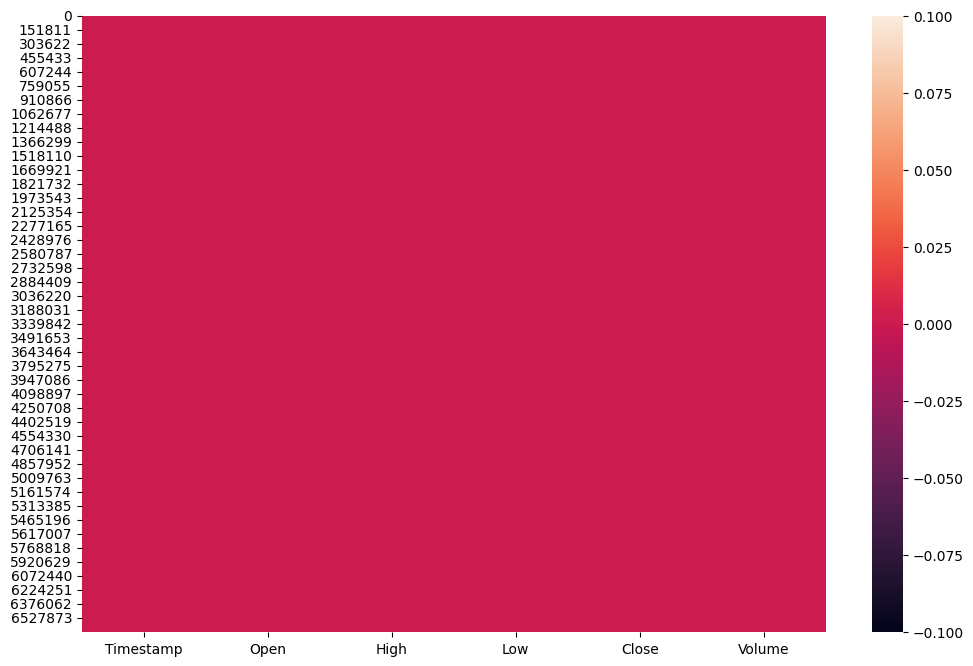

In [18]:

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

# ****GÖZETİMLİ ÖĞRENME ALGORİTMALARINDAN DOĞRUSAL REGRESYON İLE DEĞERLERİN HESABI

# ÇAPRAZ DOĞRULAMA 

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

X = df[['High']]  #Kullanılacak Verilerin Girilmesi
y = df[['Volume']]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # train ve test değişkenlerinin karşılaştırılmak için tanımlanması
model = LinearRegression()
model.fit(X_train, y_train)# Modelin Eğitilmesi
y_pred = model.predict(X_test) # Tahmin Değerinin tanımlanması
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred) #Hata hesabı için test ve tahmin değerlerinin tanımlanması



print(f"Mean Squared Error: {mse}")
print("Mean Absolute Error (MAE): ", mae)
print(f"R^2 Score: {r2}")


Mean Squared Error: 534.3266132720801
Mean Absolute Error (MAE):  7.523290372175207
R^2 Score: 0.00703186475740436


# GÖZETİMSİZ ÖĞRENME ALGORİTMALARINDAN k-MEANS KÜMELEME ALGORİTAMASININ KULLANIMI

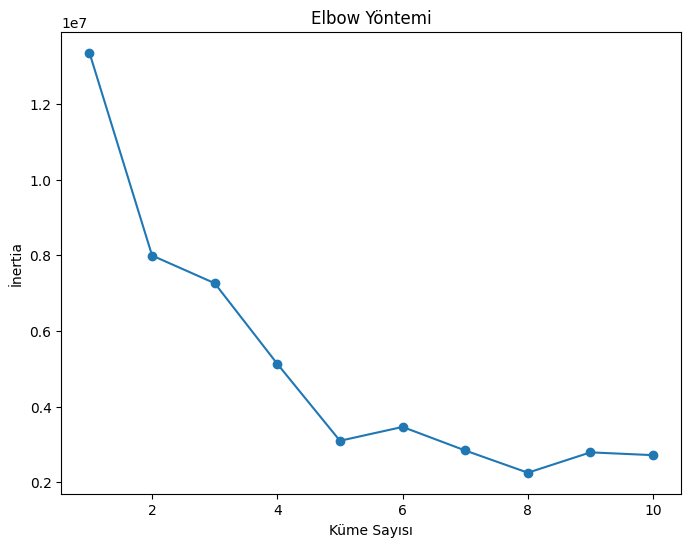

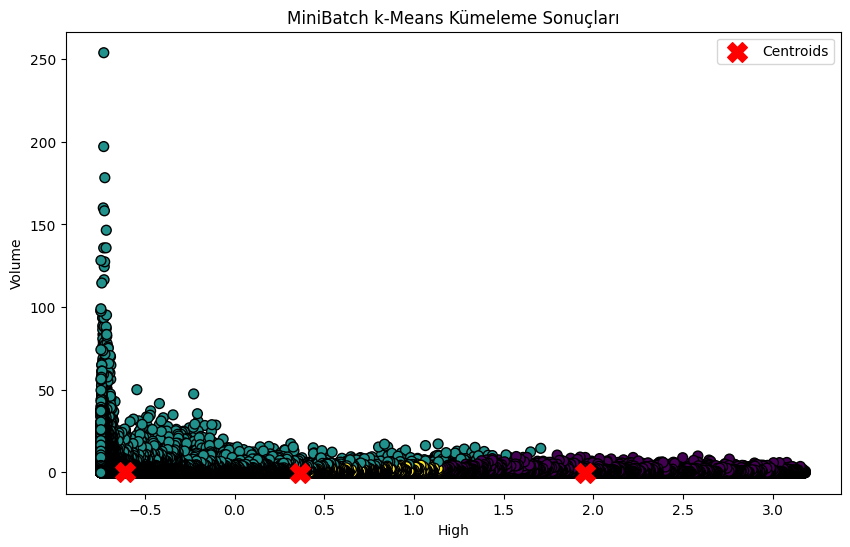

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import StandardScaler


df= pd.read_csv("/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv")

X = df[['High', 'Volume']].values   #High ve Volume sütünlarının alınması


scaler = StandardScaler()     #Verilerin ölçeklenmesi için StandardScaler nesnesini oluşturulması
X_scaled = scaler.fit_transform(X) #Alınan verilerin ölçeklendirilmesi


inertia = [] #inertia (içsel enerji) değerlerini depolamak için bir liste oluşturulması
for n_clusters in range(1, 11):
#Veri boyutundan dolayı MiniBatchKMeans algoritmasının kullanımı 
    mbkmeans = MiniBatchKMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    mbkmeans.fit(X_scaled) #Verilerin Kümelenmesi
    inertia.append(mbkmeans.inertia_) # Her bir küme sayısı için elde edilen inertia değerini listeye eklenmesi

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o') #Kümeler arasındaki inertia değerlerini çizilmesi
plt.xlabel('Küme Sayısı') #Etiketlerin eklenmesi
plt.ylabel('İnertia')
plt.title('Elbow Yöntemi') # Grafiğe başlık eklenmesi
plt.show()


n_clusters = 3
# MiniBatchKMeans algoritmasını seçilen küme sayısı ve rastgele durum ile oluşturulması
mbkmeans = MiniBatchKMeans(n_clusters=n_clusters, n_init=10, random_state=42)
mbkmeans.fit(X_scaled)


labels = mbkmeans.labels_ #Kümelendirilen verilerin etiketlerini alınması
centroids = mbkmeans.cluster_centers_ # Kümelerin merkezlerinin alınması


plt.figure(figsize=(10, 6)) #Görselleştirme için çizim oluşturulması
# Ölçeklenmiş verileri, küme etiketlerine göre renklendirerek dağılmasının çizimi
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, s=50, cmap='viridis', marker='o', edgecolor='k')
# Küme merkezlerini kırmızı X işaretleri ile gösterilmesi
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('High') #Etiketlerin eklenmesi
plt.ylabel('Volume')
plt.title('MiniBatch k-Means Kümeleme Sonuçları')
plt.legend() #Grafik üzerinde etiketlerin gösterilmesinin sağlanması
plt.show() #Grafiğin Gösterimi

